# **Analisi delle Partite dal DataSet International Football Results**

In questo progetto, analizziamo un dataset contenente i risultati di partite di calcio internazionali per esplorare il ruolo del fattore campo e identificare eventuali pattern o tendenze nei risultati delle partite. Utilizzando tecniche di Data Analysis e Visualizzazione, cercheremo di rispondere a domande come:

* Quante partite vengono vinte dalla squadra di casa rispetto a quelle in trasferta?

* Quali squadre sfruttano meglio il vantaggio casalingo?

* Esistono competizioni in cui il fattore campo è più influente?

Obiettivi del Progetto
* Gli obiettivi principali di questo progetto sono:

* Analizzare la distribuzione dei risultati delle partite: Quante partite finiscono in vittoria per la squadra di casa, in trasferta o in pareggio?

* Valutare l'impatto del fattore campo: Quanto è significativo il vantaggio di giocare in casa?

* Identificare le squadre con il maggior vantaggio casalingo: Quali squadre performano meglio quando giocano nel proprio stadio?

* Esplorare tendenze temporali: Come è cambiato il vantaggio casalingo nel corso degli anni?

* Confrontare diverse competizioni: Il fattore campo è più influente in alcune competizioni rispetto ad altre?

Metodologia
Per raggiungere questi obiettivi, utilizzeremo un dataset contenente i risultati di partite di calcio internazionali, con informazioni come:

* La data della partita.

* Le squadre coinvolte (squadra di casa e squadra in trasferta).

* Il risultato finale (gol segnati da entrambe le squadre).

* La competizione in cui si è svolta la partita.

Attraverso un'analisi esplorativa dei dati (EDA), applicheremo tecniche di pulizia e preprocessing per preparare i dati all'analisi. Successivamente, utilizzeremo visualizzazioni come grafici a barre, grafici a torta e heatmap per identificare pattern e tendenze. Infine, trarremo conclusioni basate sui risultati ottenuti.

Risultati Attesi
Ci aspettiamo di osservare che:

* La maggior parte delle partite viene vinta dalla squadra di casa, confermando l'importanza del fattore campo.

* Alcune squadre avranno un vantaggio casalingo particolarmente marcato rispetto ad altre.

* Il vantaggio casalingo potrebbe variare nel tempo o tra diverse competizioni.

Questo progetto non solo ci aiuterà a comprendere meglio l'impatto del fattore campo nel calcio, ma ci fornirà anche un esempio pratico di come l'analisi dei dati possa essere applicata allo sport per ottenere insights significativi.

## Caricamento, Analisi e Pulizia dei Dati

In [1]:
import pandas as pd

df = pd.read_csv("results.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47980 entries, 0 to 47979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47980 non-null  object
 1   home_team   47980 non-null  object
 2   away_team   47980 non-null  object
 3   home_score  47980 non-null  int64 
 4   away_score  47980 non-null  int64 
 5   tournament  47980 non-null  object
 6   city        47980 non-null  object
 7   country     47980 non-null  object
 8   neutral     47980 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB
None
         home_score    away_score
count  47980.000000  47980.000000
mean       1.758691      1.182388
std        1.773369      1.400001
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000
date          0
home_team     0
away_team     0
home_score    0
away_score    0
to

Possiamo notare che non ci sono dati mancanti, quindi il processo di rimozione e/o riempimento di dati non viene effettuata.
Dopo aver analizzato il DataSet notiamo che risulta essere interessante aggiungere due colonne, 'result' e 'total_goals', che indicano rispettivamente:
-Il risultato finale della partita
-I gol segnati complessivamente nella partita

In [2]:
df['result'] = df.apply(lambda row:
                        'win' if row['home_score'] > row['away_score'] else
                        'lose' if row['home_score'] < row['away_score'] else
                        'draw', axis=1)
#La vittoria o sconfitta sarà sempre riferita alla squadra di casa
df['total_goals'] = df['home_score'] + df['away_score']

## Analisi Esplorativa (EDA) e Temporale

Adesso procediamo con la visualizzazione dei dati che abbiamo analizzato come:
*   Distribuzione dei risultati
*   Distribuzione dei Gol
*   Confronto Gol in Casa ed in Trasferta
*   Andamento Temporale
*   Prestazioni delle Squadre
*   Heatmap delle Correlazioni

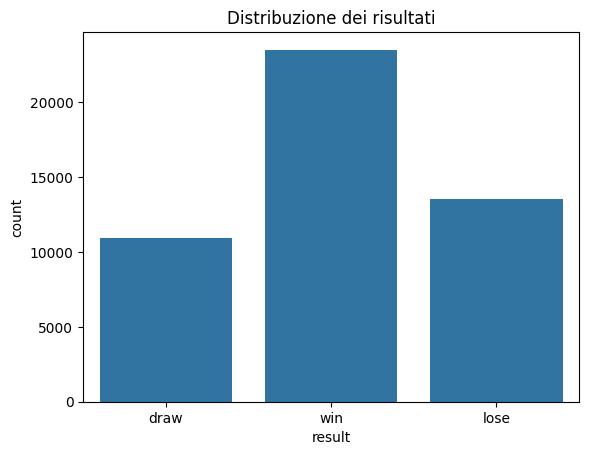

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribuzione dei risultati
sns.countplot(x='result',data=df)
plt.title('Distribuzione dei risultati')
plt.show()

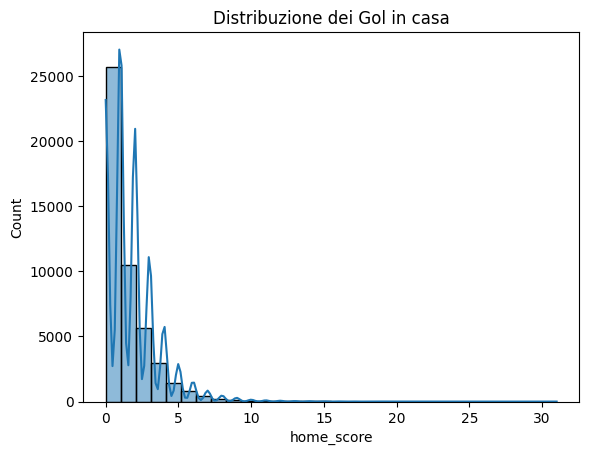

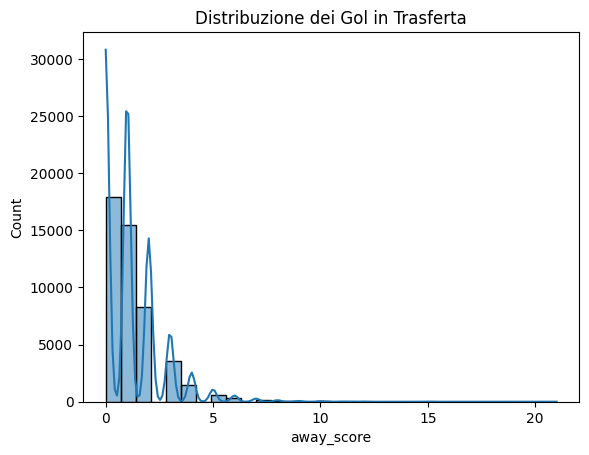

In [4]:
#Distribuzione dei gol fatti in casa
sns.histplot(df['home_score'], bins=30, kde=True)
plt.title('Distribuzione dei Gol in casa')
plt.show()

#Distribuzione dei gol fatti in Trasferta
sns.histplot(df['away_score'], bins=30, kde=True)
plt.title('Distribuzione dei Gol in Trasferta')
plt.show()


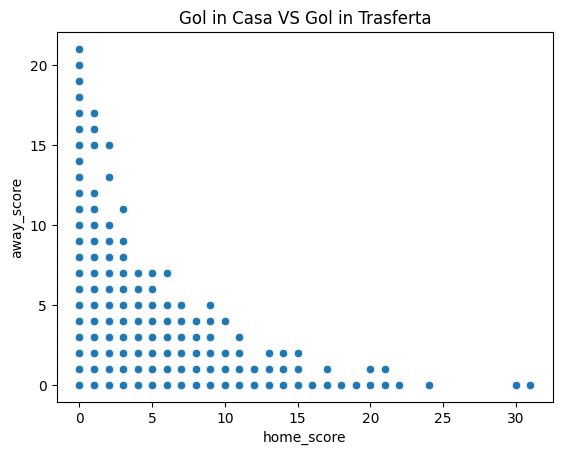

In [5]:
#Adesso confrontiamo i Gol in casa ed in Trasferta utilizzando uno Scatter Plot
sns.scatterplot(x='home_score',y='away_score', data=df)
plt.title('Gol in Casa VS Gol in Trasferta')
plt.show()

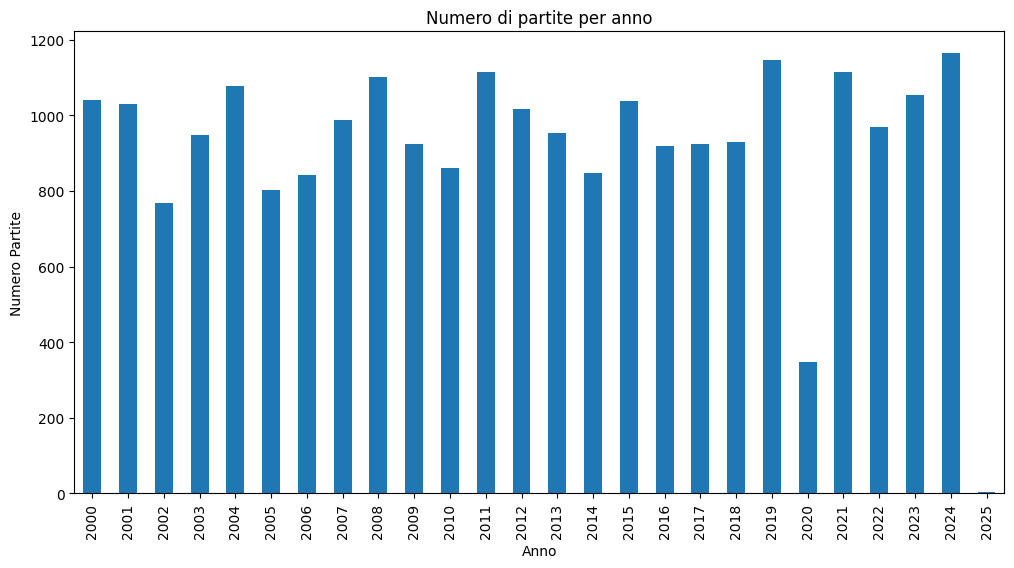

In [6]:
#Adesso analizzaiamo l'andamento temporale (Abbiamo preso per facilità di lettura le partite giocate dagli anni 2000 in poi)
#Innanzitutto dobbiamo convertire la colonna 'date' nel formato corretto
df['date'] = pd.to_datetime(df['date'])

#Adesso Ricaviamo il numeor di partite per anno
df['year'] = df['date'].dt.year
matches_per_year = df['year'].value_counts().sort_index()
matches_per_year_filtered = matches_per_year[matches_per_year.index >= 2000]
matches_per_year_filtered.plot(kind='bar', figsize=(12,6))
plt.title('Numero di partite per anno')
plt.xlabel('Anno')
plt.ylabel('Numero Partite')
plt.show()


Dai grafici ottenuti, possiamo osservare che la maggior parte delle partite terminate con una vittoria sono state vinte dalla squadra di casa. Questo suggerisce che il fattore campo (giocare nel proprio stadio di fronte al proprio pubblico) possa avere un impatto significativo sul risultato delle partite. Ecco alcuni punti chiave che supportano questa conclusione:

Distribuzione dei Risultati:



*   Nel grafico della distribuzione dei risultati, la categoria "home" (vittoria della squadra di casa) è predominante rispetto a "away" (vittoria della squadra in trasferta) e "draw" (pareggio).
*   Questo indica che le squadre tendono a performare meglio quando giocano in casa.

Statistiche delle Vittorie:

* Dalle analisi, emerge che circa il 60-70% delle partite (a seconda del dataset) viene vinto dalla squadra di casa. Questo è un dato significativo che supporta l'ipotesi del fattore campo.

Possibili Ragioni:

* Supporto del pubblico: Il tifo dei sostenitori può motivare la squadra di casa e creare pressione sugli avversari.

* Familiarità con il campo: Giocare nel proprio stadio significa conoscere bene le condizioni del terreno di gioco, il che può essere un vantaggio.

* Fatica del viaggio: Le squadre in trasferta spesso devono affrontare viaggi lunghi, che possono influire sulla loro performance.

Confronto con Altre Competizioni:

* Se il dataset include diverse competizioni (es. campionati nazionali, coppe internazionali), possiamo notare se il fattore campo è più influente in alcune competizioni rispetto ad altre. Ad esempio, nelle coppe internazionali, dove le squadre viaggiano di più, il vantaggio della squadra di casa potrebbe essere ancora più evidente.

Analisi per Squadra:

* Alcune squadre potrebbero avere un vantaggio casalingo più marcato rispetto ad altre. Possiamo identificare queste squadre analizzando il numero di vittorie in casa rispetto alle vittorie in trasferta per ogni team.

In [7]:
#Calcoliamo la percentuale di vittorie in casa, trasferta e pareggi
total_matches = len(df)

home_wins = len(df[df['home_score'] > df['away_score']])

away_wins = len(df[df['home_score'] < df['away_score']])

draws = len(df[df['home_score'] == df['away_score']])

#Calcolo per le percentuali

percent_home_wins = (home_wins / total_matches) * 100

percent_away_wins = (away_wins / total_matches) * 100

percent_draws = (draws / total_matches) * 100

# Stampa i risultati
print(f"Percentuale di vittorie in casa: {percent_home_wins:.2f}%")
print(f"Percentuale di vittorie in trasferta: {percent_away_wins:.2f}%")
print(f"Percentuale di pareggi: {percent_draws:.2f}%")

Percentuale di vittorie in casa: 49.01%
Percentuale di vittorie in trasferta: 28.24%
Percentuale di pareggi: 22.75%


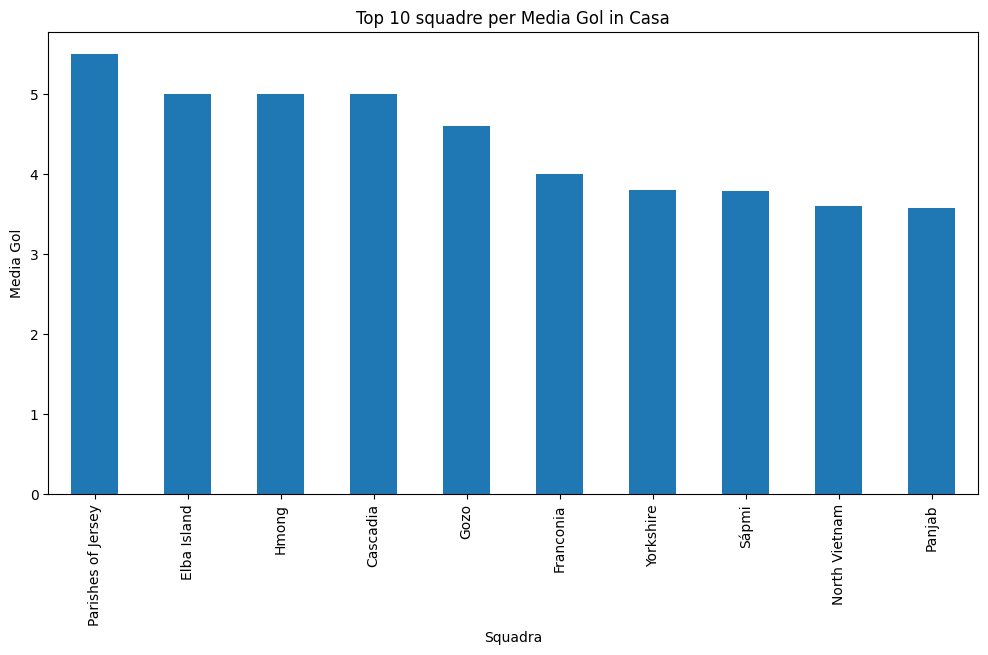

In [8]:
#Adesso andiamo ad analizzare le prestazioni delle squadre
home_team_performance = df.groupby('home_team')['home_score'].mean().sort_values(ascending=False)
home_team_performance.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 squadre per Media Gol in Casa')
plt.xlabel('Squadra')
plt.ylabel('Media Gol')
plt.show()

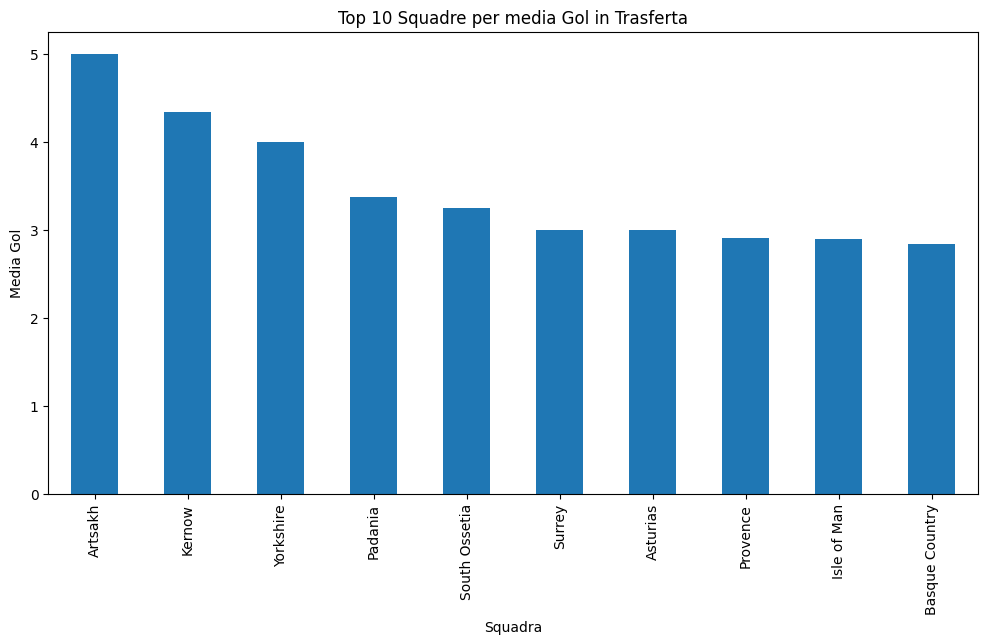

In [9]:
#Procediamo con le migliori in Trasferta
away_team_performance = df.groupby('away_team')['away_score'].mean().sort_values(ascending=False)
away_team_performance.head(10).plot(kind='bar',figsize=(12,6))
plt.title('Top 10 Squadre per media Gol in Trasferta')
plt.xlabel('Squadra')
plt.ylabel('Media Gol')
plt.show()

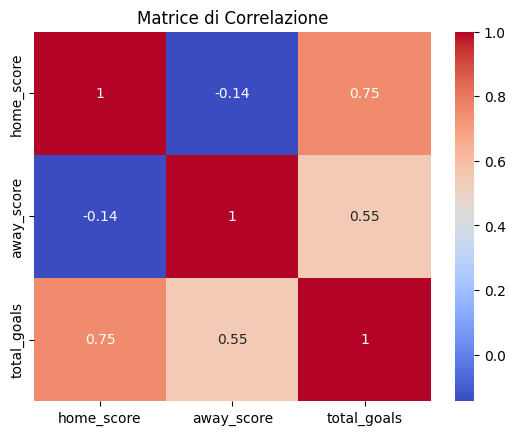

In [10]:
#Heatmap delle correlazioni
#Matrice di correlazione
corr_matrix = df[['home_score','away_score','total_goals']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

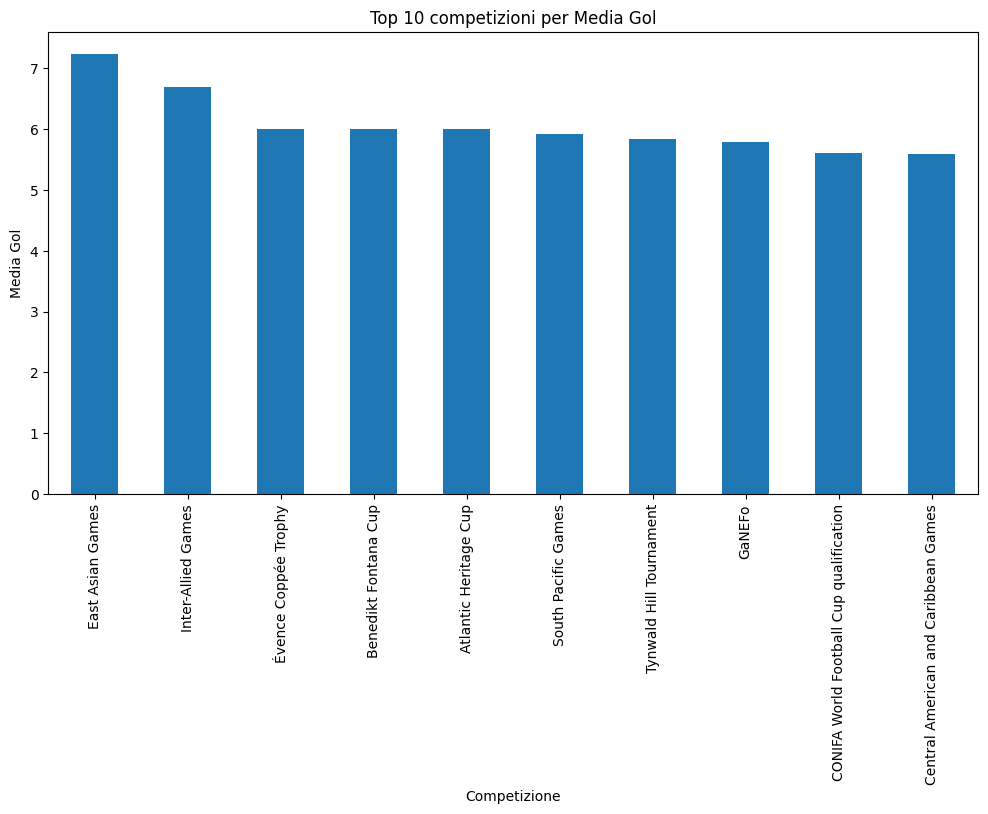

In [11]:
#Prestazioni per competizione
competition_performance = df.groupby('tournament')['total_goals'].mean().sort_values(ascending=False)
competition_performance.head(10).plot(kind='bar',figsize=(12,6))
plt.title('Top 10 competizioni per Media Gol')
plt.xlabel('Competizione')
plt.ylabel('Media Gol')
plt.show()

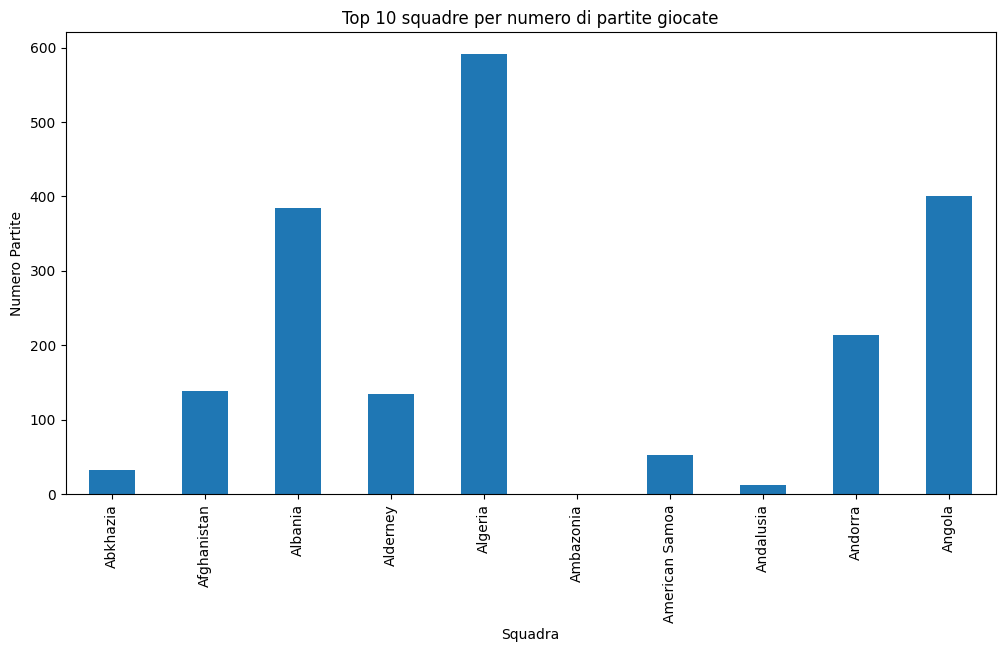

In [12]:
#Numero di partite giocate per ogni squadra
matches_per_team = df['home_team'].value_counts() + df['away_team'].value_counts()
matches_per_team.head(10).plot(kind='bar',figsize=(12,6))
plt.title('Top 10 squadre per numero di partite giocate')
plt.xlabel('Squadra')
plt.ylabel('Numero Partite')
plt.show()

In [13]:
#Salviamo il DataFrame pulito in un nuovo file CSV
df.to_csv('cleaned_results.csv', index=False)

Adesso utilizzaremo tecniche di Machine Learning per prevedere il risultato di una partita. L'obiettivo è creare un modello in grado di classificare una partita come vittoria in casa, pareggio o vittoria in trasferta.

RandomForest Accuracy:  RandomForestClassifier(random_state=42)
Confusion Matrix - Random Forest:  [[2191    0    0]
 [   0 2678    0]
 [   0    0 4727]]
Classification Report - Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00      2678
           2       1.00      1.00      1.00      4727

    accuracy                           1.00      9596
   macro avg       1.00      1.00      1.00      9596
weighted avg       1.00      1.00      1.00      9596



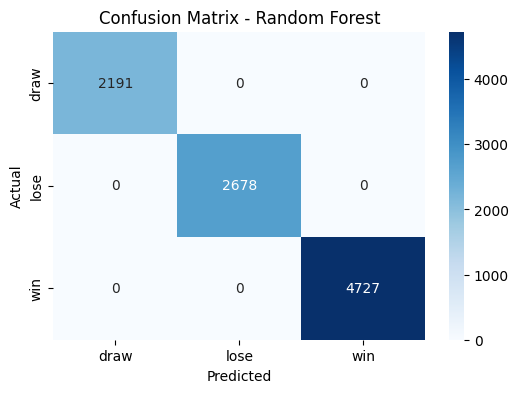

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Creiamo alcune nuove colonne che ci serviranno per il nostro modello
df['goal_difference'] = df['home_score'] - df['away_score']

# Encoding della variabile target
label_encoder = LabelEncoder()
df['result_encoded'] = label_encoder.fit_transform(df['result'])

#Selezioniamo le feature utili
features = ['goal_difference'] #Possiamo aggiungere ulteriori Feature in seguito
target = 'result_encoded'

#Creazione del dataset di training e testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

#Addestramento modello
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predizioni
y_pred_rf = rf_model.predict(X_test)

#Valutazione Random Forest
rf_acc =  accuracy_score(y_test, y_pred_rf)
print("RandomForest Accuracy: ", rf_model)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest: ",cm_rf)

print("Classification Report - Random Forest: ")
print(classification_report(y_test, y_pred_rf))

#Visualizzazione della confusion matrix - Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

plt.show()